<a href="https://colab.research.google.com/github/wuke0708/5001/blob/main/CIV_Group2_f2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 1.Title & Introduction
 - **Project Title:** Data analysis and prediction model construction for the survival of the Titanic
 - **Team Members & Roles:**
 * Junting Wu:Team leader,Data Analyst
 * Hong Xiao:Data Analyst,Model tester
 * Kuangfeng Gong: Data Analyst,ML Engineer
 * Linyun Zheng: ML Engineer,Storytelling Specialist
 * Yiran Liu: Data Analyst,Model tester
 * Ziyan Wan: Data Analyst,Storytelling Specialist
 - **Project Overview & Objectives:**
 This project utilizes the Titanic passenger dataset to investigate the complex interplay of various factors that influenced survival during the 1912 disaster. The dataset encompasses a range of variables, including passenger survival outcome (survived), demographic details (name, age, sex), socioeconomic status (pclass, fare), family dynamics (sibsp, parch) and travel details (embarked, cabin, ticket). By examining these variables, the project aims to quantify their individual and combined impacts on survival rates, revealing potential biases and patterns in the evacuation process.

 The primary objective is to develop a robust predictive model that can accurately forecast survival outcomes based on the available passenger data. This model will be informed by a thorough analysis of the dataset, which will include quantifying the influence of each variable on survival. For instance, the analysis will assess how factors such as age, gender, and passenger class interact to affect the likelihood of survival. Additionally, the project will explore the role of family size, fare paid, and embarkation point, providing a comprehensive understanding of the factors that determined survival.

 By developing this predictive model, the project seeks to validate historical accounts of the disaster and uncover any systemic inequalities in the evacuation process. The insights gained from this analysis will not only enhance our understanding of the Titanic tragedy but also inform the development of equitable emergency response protocols for modern crises.e emergency response protocols in modern crises.

## 2. Dataset Overview & Narrative
### 2.1. Dataset Description
- **Introduction:**
The Titanic dataset, From the learning materials of the course, contains records of 891 passengers aboard the RMS Titanic during its ill-fated 1912 maiden voyage. This sample represents approximately 40% of the total passengers and crew (2,224 individuals), with data encompassing demographic, socioeconomic, and travel-specific attributes. Key variables include survival status (Survived: 0/1), passenger class (Pclass: 1st, 2nd, 3rd), name (Name), gender (Sex), age (Age), number of siblings/spouses (SibSp) and parents/children (Parch) aboard, ticket details (Ticket), fare paid (Fare), cabin number (Cabin), and embarkation port (Embarked: C = Cherbourg, Q = Queenstown, S = Southampton). Notable gaps exist, particularly in the Age (≈20% missing) and Cabin (≈77% missing) fields, which require careful handling during analysis. The dataset serves as a critical resource for exploring survival disparities tied to gender, class, and familial relationships during the disaster.
- **Feature Overview:**
 The Titanic dataset includes the following critical features, each contributing uniquely to understanding survival patterns during the disaster:
* Survival Outcome
 * Survived: Binary target variable (0 = died, 1 = survived) used to model relationships between features and outcomes.
* Demographic Details
 * Sex: Central to testing the "women and children first" protocol. Historical accounts suggest gender heavily influenced survival, with women prioritized.
 * Age: Helps identify whether children (often defined as （18 years) had higher survival rates, reflecting ethical evacuation priorities. Missing values (~20%) require imputation to avoid bias.
 * Name: Including surname, given name, and possible titles (such as Mr., Mrs., Miss, Master, etc.). These titles can reflect the social status and age range of passengers.
* Socioeconomic Status
 * Pclass (Passenger Class): A proxy for wealth and social hierarchy. Higher classes (1st) had cabin locations closer to lifeboats, potentially increasing survival odds.
 * Fare: Correlates with Pclass; higher fares may indicate better access to resources or evacuation advantages.
* Travel-Specific Attributes
 * Cabin: Cabin location (e.g., proximity to decks) might correlate with survival, but ~77% missing data limits direct analysis. Partial codes (e.g., "C123") can infer deck levels for subgroups.
 * Embarked: Embarkation port (Cherbourg, Queenstown, Southampton) may reflect regional socioeconomic differences, indirectly linking to class or survival resources.
* Family Dynamics
 * SibSp (Siblings/Spouses) & Parch (Parents/Children): Combined as family size, these variables explore whether traveling with family improved survival (e.g., group coordination) or hindered it (e.g., slower evacuation).
* Relevance to Analysis
 These features collectively reveal how structural inequalities (e.g., class-based resource access) and societal norms (e.g., gender prioritization) shaped life-and-death decisions. For example:
 * Sex and Age test the reality of ethical evacuation policies.
 * Pclass and Fare quantify privilege in crisis access.

### 2.2. Formulated Data Questions
- **Categorisation:**
- **EDA Related Questions:**
 1. Is the principle of prioritizing women reflected in all age groups (children and adolescents, adults, elderly)?
 2. Could there be differences in survival rates among passengers of different seat classes during rescue operations due to different priorities?
 3. Could the differences in family situations possibly affect the rescue rate to a certain extent by influencing the survival beliefs of the passengers on the ship?
 4. Passengers with different names represent their different genders, social statuses, occupations, etc. Does the difference in their identities affect the probability of being survived?
 5. Whether passengers boarding ships at different ports have different characteristics leads to different survival rates?
- **ML Related Questions:**
 1. Which features provide genuine predictive power vs. spurious correlations,and how to measure the correlation with data?
 2. How would survival rates change if some features were randomized?

### 2.2. Revised Data Questions & Narrative
- **Revisited Data Questions:**
 Restate the key questions and indicate which were answered via EDA and which required ML analysi
s.
- **Narrative Integration:**
 Explain how your analysis evolved and how your insights add value to understanding the underlying
phenomena.

## 3. Complete Data Science Workflow
### 3.1. Exploratory Data Analysis (EDA)
- **Comprehensive Visualisations & Statistics:**
 Present a set of updated plots, charts, and statistical summaries.
- **Updated Insights:**
 Summarise the refined insights from the expanded EDA.

Data reading
- Import libiraries

In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

- Load data: Convert CSV file into a Pandas dataframe

In [ ]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/wuke0708/5001/refs/heads/main/Titanic-Dataset.csv")

Simple analysis and processing of data
- Viewing the dataframe

In [ ]:
#Return number of rows and columns
df.shape,df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [ ]:
#Return first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#take a look at the descriptive statistics of the data below
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data shows that there are a total of 891 passengers and 12 columns of features in the training dataset, among which three columns of data are missing:
1. Age: There are only 714 complete records, and 177 records are missing;
2. Cabin: Only 204 passengers are known, and 687 records are missing. The number of missing records is quite large;
3. Embarked : Only two records are missing.

- Handling of missing values




In [ ]:
# For missing Embarked values, fill in using the most common categories
df.Embarked[df.Embarked.isnull()] = df.Embarked.dropna().mode().values
# For the Cabin number, since there is too much missing data, the missing data is replaced with 'U0' to indicate unknown
df['Cabin'] = df.Cabin.fillna('U0')
# For age, the average is used to fill in the missing values
df['Age']=df['Age'].fillna( df['Age'].mean() )

In [ ]:
#Return first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


Exploratory analysis

- Overview of Basic Data Information

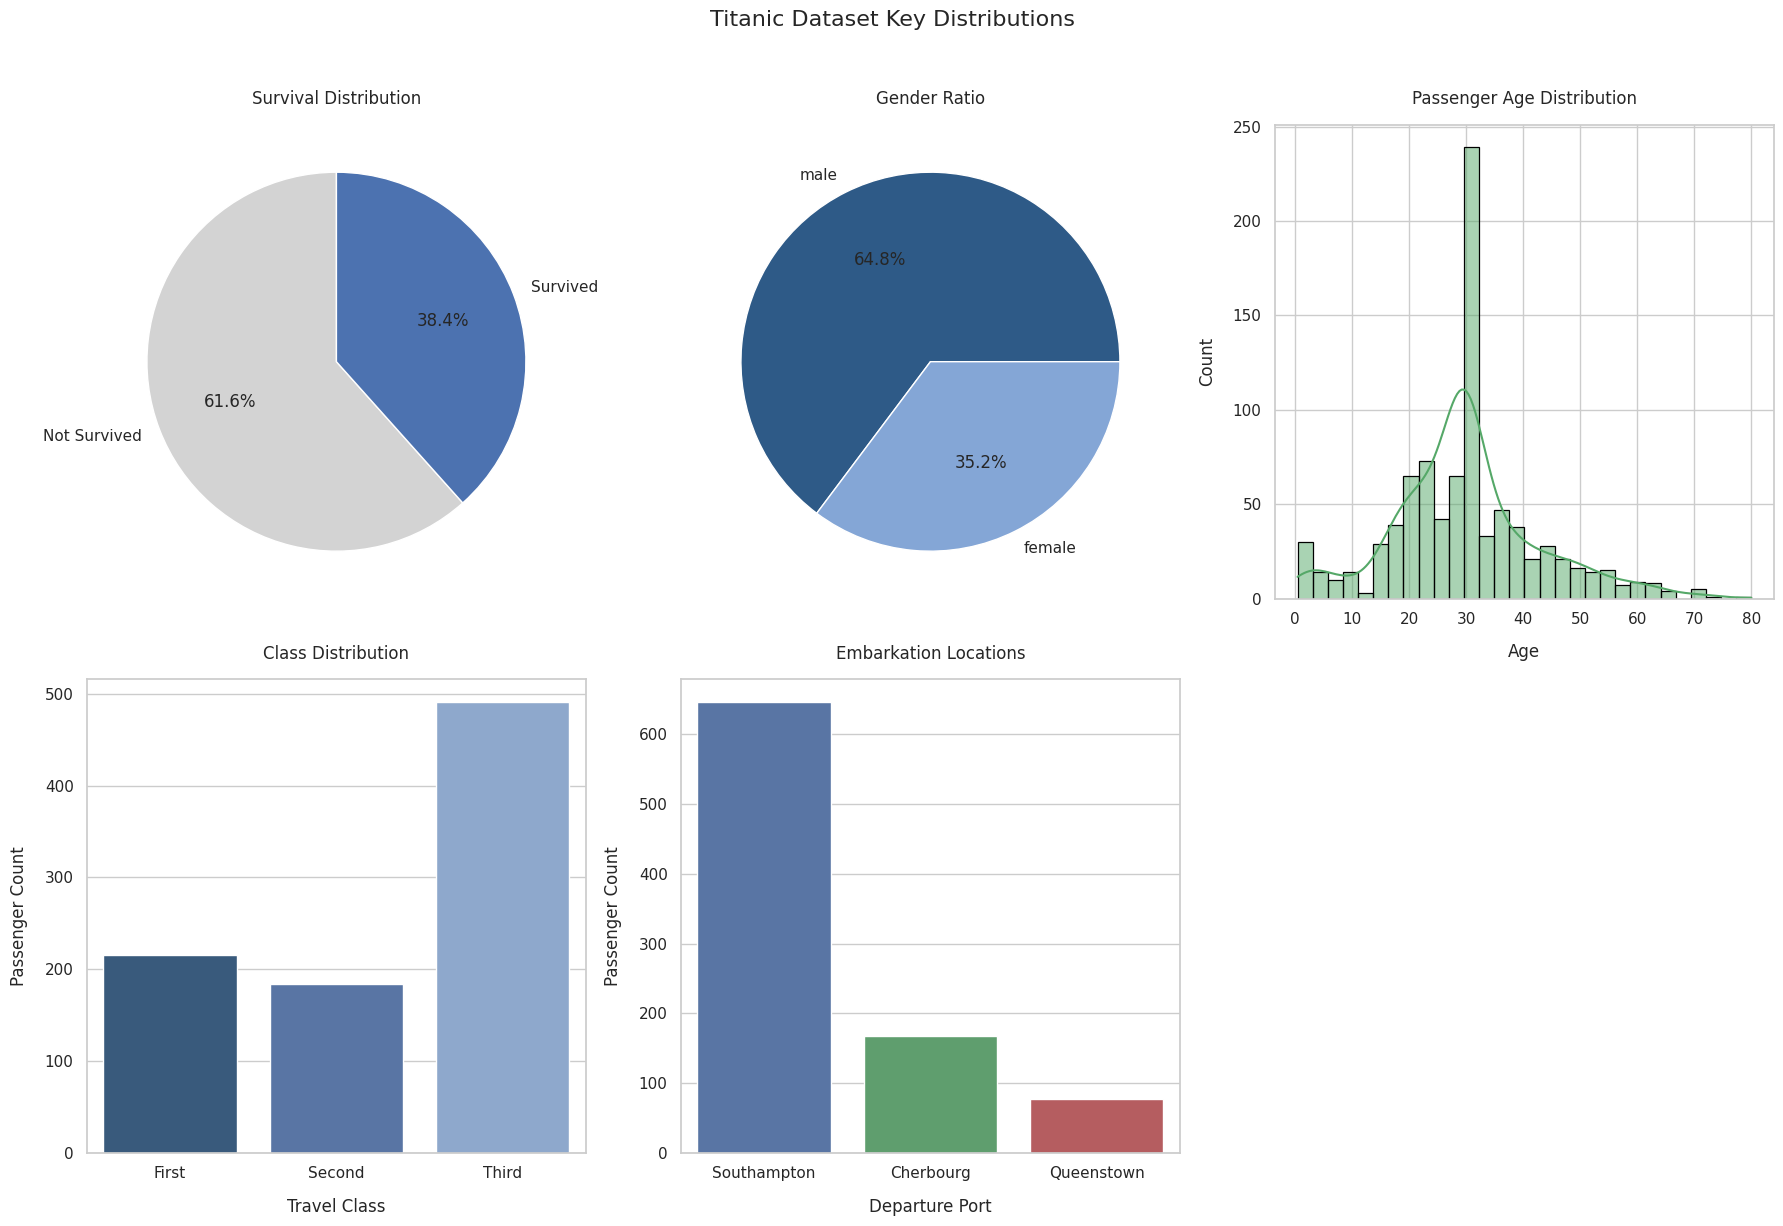

In [ ]:
# Configure global settings
plt.figure(figsize=(18, 12))
plt.suptitle("Titanic Dataset Key Distributions", y=1.02, fontsize=16)

# ---------------------------
# 1. Survival Ratio Pie Chart
# ---------------------------
plt.subplot(2, 3, 1)
survival_counts = df['Survived'].value_counts()
plt.pie(survival_counts,
        labels=['Not Survived', 'Survived'],
        autopct='%1.1f%%',
        colors=['#D3D3D3', '#4C72B0'],
        startangle=90)
plt.title("Survival Distribution")

# ---------------------------
# 2. Gender Distribution
# ---------------------------
plt.subplot(2, 3, 2)
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        colors=['#2E5A87', '#84A6D6'])
plt.title("Gender Ratio")

# ---------------------------
# 3. Age Distribution Histogram
# ---------------------------
plt.subplot(2, 3, 3)
sns.histplot(df['Age'].dropna(),
            bins=30,
            kde=True,
            color='#55A868',
            edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Passenger Age Distribution")

# ---------------------------
# 4. Passenger Class Distribution
# ---------------------------
plt.subplot(2, 3, 4)
sns.countplot(x='Pclass',
             data=df,
             order=sorted(df['Pclass'].unique()),
             palette=['#2E5A87', '#4C72B0', '#84A6D6'])
plt.xticks([0,1,2], ['First', 'Second', 'Third'])
plt.xlabel("Travel Class")
plt.ylabel("Passenger Count")
plt.title("Class Distribution")

# ---------------------------
# 5. Embarkation Ports
# ---------------------------
plt.subplot(2, 3, 5)
df['Embarked'] = df['Embarked'].map(
    {'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}
).fillna('Unknown')
sns.countplot(x='Embarked',
             data=df,
             order=['Southampton','Cherbourg','Queenstown'],
             palette=['#4C72B0', '#55A868', '#C44E52'])
plt.xlabel("Departure Port")
plt.ylabel("Passenger Count")
plt.title("Embarkation Locations")

plt.tight_layout()
plt.show()

Based on the data, it is drawn as shown in the above figure. From the figure, we can obtain some information:
- Less than half of the people were survived and most of them died.
- More men boarded the ship, twice as many as women.
- The third-class cabin has the largest number of passengers, close to 500,
- while the first and second-class cabins have relatively fewer passengers, both around 200.
- It can be seen from the age distribution that the age distribution of the passengers is relatively scattered and has a large span (Excluding the data outliers caused by the loss of some age data, the average age was added to handle the lost data).
- Among the re-boarding ports, Port S had the largest number of uploaders, with over 600 people. The other two ports, Port C and Port Q, each had less than 200 people, which was much smaller than Port S.

Next, we will further analyze the impact of different parameters on the survival rate and their direct relationship.

**1. The survival situations of different ages and genders**

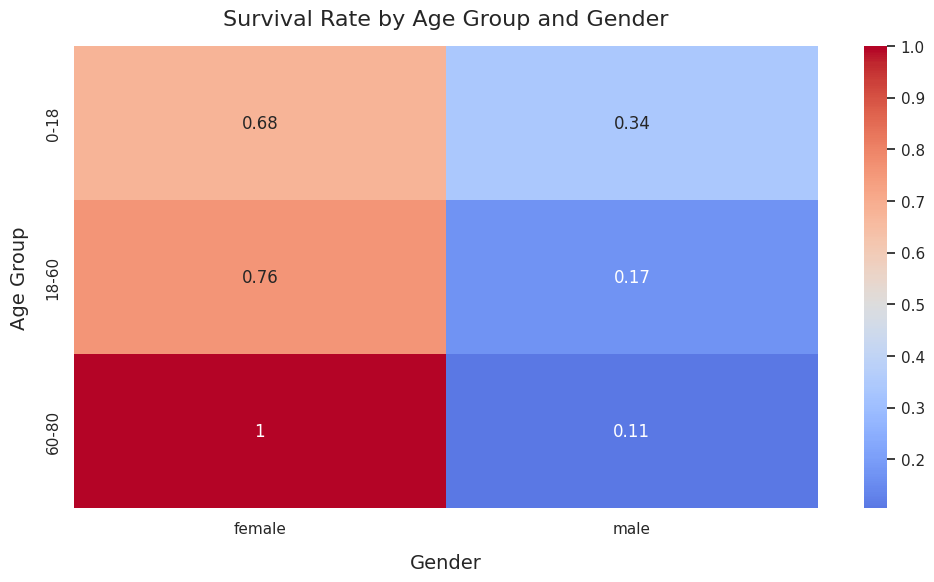

In [ ]:
# Create a new column to group ages
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 60, 80], labels=['0-18', '18-60', '60-80'])

# Combines age and gender factors to analyze survival rates
plt.figure(figsize=(12, 6))
sns.heatmap(df.pivot_table(index='AgeGroup', columns='Sex', values='Survived'), annot=True, cmap='coolwarm', center=0.5)
plt.title('Survival Rate by Age Group and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.show()

Base on the data, we can obtain some informations:
* The principle of "women first" is very evident in adults and the elderly, with women having significantly higher survival rates than men in these two age groups.
* In the groups of children and adolescents, there is not much difference in survival rates between females and males, which may be due to the principle of "child first" also playing a role.
* Overall, the data supports the impact of the "women first" principle across different age groups, especially among adults and the elderly, and this principle seems to be more widely followed.


**2. The survival status of each passenger level**





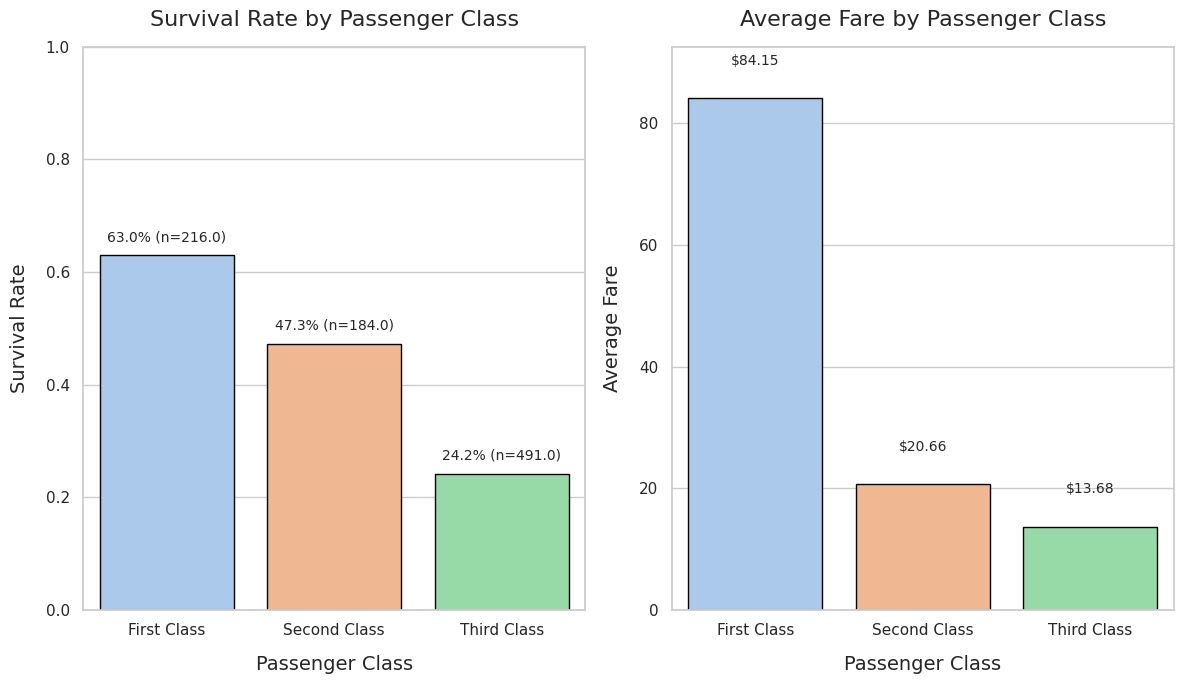

In [ ]:
# Data preparation: Calculate survival rates and average fares based on passenger class
class_survival = df.groupby('Pclass').agg(
    Survival_Rate=('Survived', 'mean'),
    Average_Fare=('Fare', 'mean'),
    Passenger_Count=('PassengerId', 'count')
).reset_index()

# Visualization setup
plt.figure(figsize=(12, 7))

# Create a bar plot for survival rates
plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Survival_Rate', data=class_survival, palette='pastel',
            capsize=0.1, edgecolor='black')
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.ylim(0, 1)
plt.xticks(ticks=[0, 1, 2], labels=['First Class', 'Second Class', 'Third Class'])

# Add data labels for survival rates
for idx, row in class_survival.iterrows():
    plt.text(idx, row['Survival_Rate'] + 0.02, f"{row['Survival_Rate']:.1%} (n={row['Passenger_Count']})",
             ha='center', va='bottom', fontsize=10)

# Create a bar plot for average fares
plt.subplot(1, 2, 2)
sns.barplot(x='Pclass', y='Average_Fare', data=class_survival, palette='pastel',
            capsize=0.1, edgecolor='black')
plt.title('Average Fare by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.ylim(0, class_survival['Average_Fare'].max() * 1.1)
plt.xticks(ticks=[0, 1, 2], labels=['First Class', 'Second Class', 'Third Class'])

# Add data labels for average fares
for idx, row in class_survival.iterrows():
    plt.text(idx, row['Average_Fare'] + 5, f"${row['Average_Fare']:.2f}",
             ha='center', va='bottom', fontsize=10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

From the table, we can find that the average ticket prices of different seat classes have significant differences. The first-class has the highest ticket price, followed by the second-class , and the third-class  has the lowest ticket price.

In the comparison chart of survival rates, we can find that passengers at first class have the highest probability of being rescued, and as the level decreases, the probability of being rescued also decreases.

Passenger level is an important feature affecting rescue. Further speaking, passengers who pay more may have a higher priority in rescue operations.

**3.Examine the impact of gender and fare on survival rate under the superposition of effects**

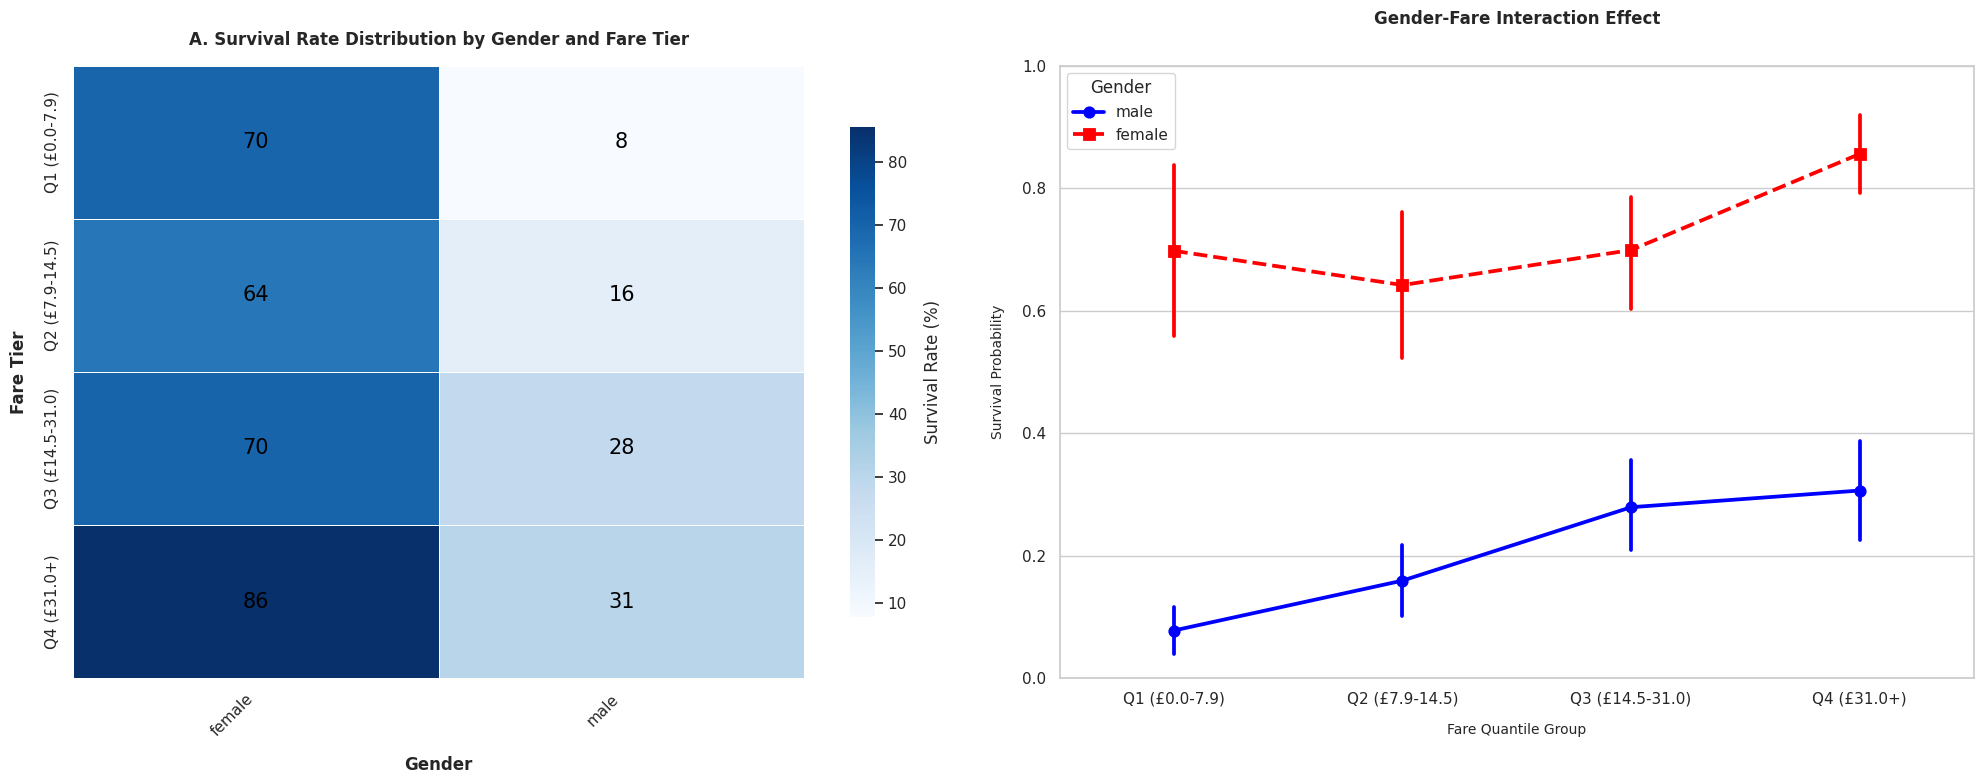

In [ ]:
# 1. Dynamic Fare Tier Creation
fare_quantiles = df['Fare'].quantile([0, 0.25, 0.5, 0.75, 1.0]).tolist()

FARE_LABELS = [
    f'Q1 (£{fare_quantiles[0]:.1f}-{fare_quantiles[1]:.1f})',
    f'Q2 (£{fare_quantiles[1]:.1f}-{fare_quantiles[2]:.1f})',
    f'Q3 (£{fare_quantiles[2]:.1f}-{fare_quantiles[3]:.1f})',
    f'Q4 (£{fare_quantiles[3]:.1f}+)'
]

df['Fare_Group'] = pd.qcut(
    df['Fare'],
    q=4,
    labels=FARE_LABELS,
    duplicates='drop'
)

# 2. Create Survival Rate Matrix
survival_matrix = (
    df.groupby(['Sex', 'Fare_Group'], observed=False)['Survived']
    .mean()
    .unstack()
    .T * 100
)

# 3. Visualization Configuration
plt.figure(figsize=(20, 8))
plt.rcParams.update({
    'font.family': 'sans-serif',
    'axes.titlepad': 15,
    'axes.labelpad': 12
})

# Subplot 1: Survival Rate Heatmap
plt.subplot(1, 2, 1)
heatmap = sns.heatmap(
    survival_matrix,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={'label': 'Survival Rate (%)', 'shrink': 0.8},
    annot_kws={"size": 15, "va": 'center', "color": '#000000'}
)

heatmap.set_title('A. Survival Rate Distribution by Gender and Fare Tier', fontweight='bold')
heatmap.set_xlabel('Gender', fontweight='semibold')
heatmap.set_ylabel('Fare Tier', fontweight='semibold')
plt.xticks(rotation=45, ha='right', fontsize=11)

# Subplot 2: Interactive Effect Visualization
plt.subplot(1, 2, 2)
sns.pointplot(x='Fare_Group', y='Survived', hue='Sex', data=df,
              palette={'male':'blue', 'female':'red'},
              markers=['o', 's'], linestyles=['-', '--'])
plt.title('Gender-Fare Interaction Effect\n', fontsize=12, fontweight='bold')
plt.xlabel('Fare Quantile Group', fontsize=10)
plt.ylabel('Survival Probability', fontsize=10)
plt.ylim(0, 1)
plt.legend(title='Gender', loc='upper left')

plt.tight_layout()
plt.show()

Interaction Between Gender and Fare:
* Overall, the higher the ticket price, the higher the survival rate,however, in terms of presentation form, there are certain differences
 * Females: Survival rate rises from 70% (Q1) to 86% (Q4),and the survival rate remained almost unchanged between Q1 and Q3.
 * Males: Survival rate increases from 8% (Q1) to 31% (Q4),the survival rate shows a steady upward trend.
* Gender effect: It can be seen from the figure that the survival rate of women has always been far higher than that of men.
* Fare effect: With the increase in ticket prices, the survival rate is also showing an upward trend.
* Interaction term: From the graph, it can be seen that as ticket prices increase, the impact on male survival rate is greater than that on female.High ticket prices may provide women with double protection (gender privilege + resource access), while men only gain the advantage of basic ticket prices.

**4.The survival status of each embarkation port**

After preprocessing the data, it was found that the boarding port information was accurate for two individuals. Since the number of missing data entries was relatively small compared to the total number of individuals, the mode was used to fill in the missing boarding port information. Then, the relationship between the boarding port and survival rate was analyzed.

In [ ]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/wuke0708/5001/refs/heads/main/Titanic-Dataset.csv")

# Calculate the mode of the Embarked column
mode_port = df['Embarked'].mode()[0]

# Fill missing values ​​using the mode
df['Embarked'].fillna(mode_port, inplace=True)

# Verify if there are any missing
missing_after = df['Embarked'].isnull().sum()
print(f"The number of missing values ​​in the Embarked column after filling: {missing_after}")

The number of missing values ​​in the Embarked column after filling: 0


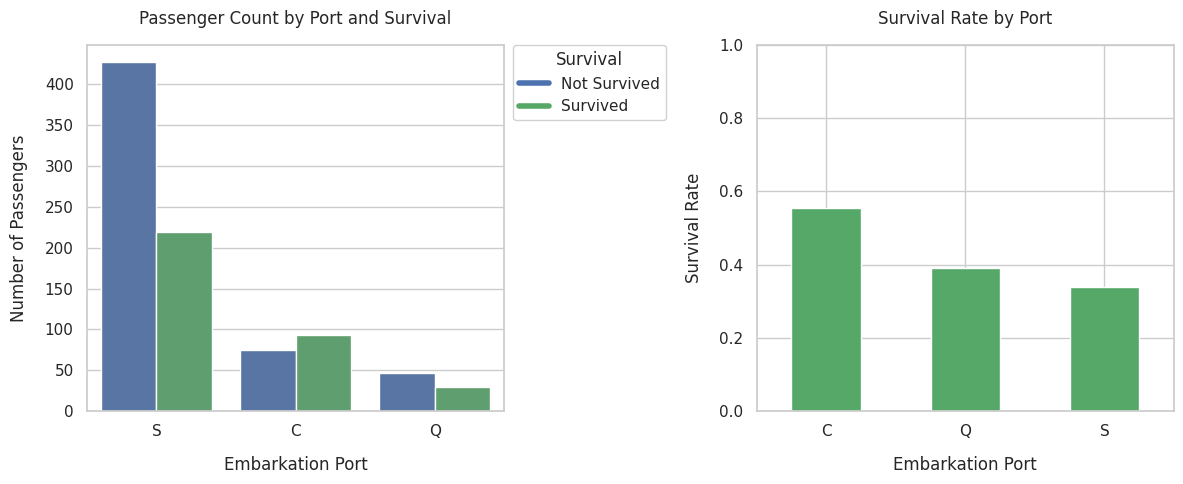

In [ ]:
# Specify Embarked as an ordered category
sns.set(style="whitegrid")
colors = ['#4C72B0', '#55A868']
order = ['S', 'C', 'Q']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Passenger Count by Port and Survival
sns.countplot(data=df, x='Embarked', hue='Survived', order=order, palette=colors, ax=axes[0])
axes[0].set_title('Passenger Count by Port and Survival')
axes[0].set_xlabel('Embarkation Port')
axes[0].set_ylabel('Number of Passengers')
axes[0].legend(title='Survived', labels=['No', 'Yes'])

# Plot 2: Survival Rate by Port
# Group by Embarked and calculate the survival rate
embark_rate = df.groupby('Embarked')['Survived'].mean()

embark_rate.plot(
    kind='bar', color=colors[1],
    ax=axes[1]
)
axes[1].set_title('Survival Rate by Port')
axes[1].set_xlabel('Embarkation Port')
axes[1].set_ylabel('Survival Rate')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=0)

# Create custom legend handles
handles = [
    plt.Line2D([0], [0], color=colors[0], lw=4),
    plt.Line2D([0], [0], color=colors[1], lw=4)
]

# Add legend to the right of the first subplot
axes[0].legend(
    handles, ['Not Survived', 'Survived'],
    title='Survival',
    bbox_to_anchor=(1.02, 1),  # Position legend outside upper-right of subplot
    loc='upper left',
    borderaxespad=0,
    frameon=True,
    framealpha=0.9
)

plt.tight_layout()
plt.show()

It can be seen that the survival rate varies depending on the boarding port, with Port C having the highest survival rate, followed by Port Q, and Port S having the lowest. In the previous analysis, it was found that women have a higher chance of survival than men, children have a higher chance of survival than adults, and passengers who purchased first or second-class tickets have a higher survival rate compared to those who bought third-class tickets. Does this pattern also apply to passengers boarding at different ports?

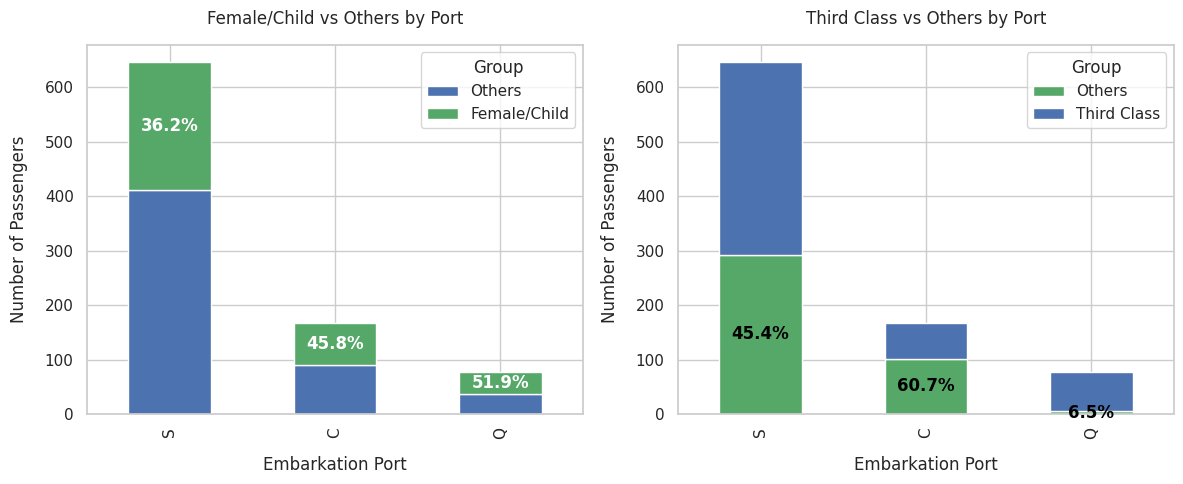

In [ ]:
# Complete the following preprocessing
df['Embarked']   = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['IsChild']   = df['Age'].fillna(13) <= 12
df['IsPriority']  = df['IsChild'] | (df['Sex'] == 'female')
df['IsThirdClass'] = df['Pclass'] == 3

# Aggregate count
order = ['S', 'C', 'Q']
counts_pri  = df.groupby(['Embarked','IsPriority']).size().unstack(fill_value=0).reindex(order)
counts_thrd = df.groupby(['Embarked','IsThirdClass']).size().unstack(fill_value=0).reindex(order)

# Calculate percentage
pct_pri  = counts_pri[True]  / counts_pri.sum(axis=1)  * 100
pct_other= counts_thrd[False] / counts_thrd.sum(axis=1) * 100

# Drawing
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left：Female/Child vs Others
counts_pri.plot(kind='bar', stacked=True,
                color=['#4C72B0','#55A868'], ax=axes[0])
axes[0].set_title('Female/Child vs Others by Port')
axes[0].set_xlabel('Embarkation Port'); axes[0].set_ylabel('Number of Passengers')
axes[0].legend(['Others','Female/Child'], title='Group'); axes[0].tick_params(axis='x', rotation=90)

for i, port in enumerate(order):
    o = counts_pri.loc[port, False]
    f = counts_pri.loc[port, True]
    # In the "Female/Child" regional center
    axes[0].text(i, o + f/2, f'{pct_pri.loc[port]:.1f}%', ha='center', va='center',
                 color='white', fontweight='bold')

# Right：Third Class vs Others
counts_thrd.plot(kind='bar', stacked=True,
                 color=['#55A868','#4C72B0'], ax=axes[1])
axes[1].set_title('Third Class vs Others by Port')
axes[1].set_xlabel('Embarkation Port'); axes[1].set_ylabel('Number of Passengers')
axes[1].legend(['Others','Third Class'], title='Group'); axes[1].tick_params(axis='x', rotation=90)

for i, port in enumerate(order):
    o = counts_thrd.loc[port, False]
    # In the "Others" regional center
    axes[1].text(i, o/2, f'{pct_other.loc[port]:.1f}%', ha='center', va='center',
                 color='black', fontweight='bold')

plt.tight_layout()
plt.show()

The embarkation port not only determines where passengers boarded the ship, but also, to some extent, reflects their social background—such as their socioeconomic class or whether there were more women and children among them. These characteristics are closely linked to the likelihood of survival. Therefore, the embarkation port can be seen as a representative variable that, together with factors like gender and ticket class, jointly influences the chances of survival. This set of graphs further sheds light on the potential reasons for this connection:
* Among passengers who boarded at Port C, the proportion of women and children was relatively high (45.8%), and a large share held first- or second-class tickets—only 39.3% were in third class. This aligns with the previously observed pattern that women, children, and higher-class passengers had a greater chance of survival.

* Passengers from Port Q had the highest proportion of women and children (51.9%), but the vast majority were in third class (as high as 93.5%), which may explain why the overall survival rate was still not very high.

* In contrast, Port S had the largest number of passengers, but only 36.2% were women or children, and the proportion of third-class passengers was the highest at 54.6%. This likely contributed to its being the port with the lowest survival rate.

**5. Examine the survival situations of passengers with different numbers of accompanying family members.**

In [ ]:
# Calculate the total number of family members (including oneself) for each passenger.
df['FamilySize']=df['SibSp']+df['Parch']+1

# Calculate the survival rate by grouping according to family size.
family_survival=df.groupby('FamilySize')['Survived'].agg(Survival_Rate='mean',Passenger_Count='count').reset_index()
print(family_survival)

   FamilySize  Survival_Rate  Passenger_Count
0           1       0.303538              537
1           2       0.552795              161
2           3       0.578431              102
3           4       0.724138               29
4           5       0.200000               15
5           6       0.136364               22
6           7       0.333333               12
7           8       0.000000                6
8          11       0.000000                7


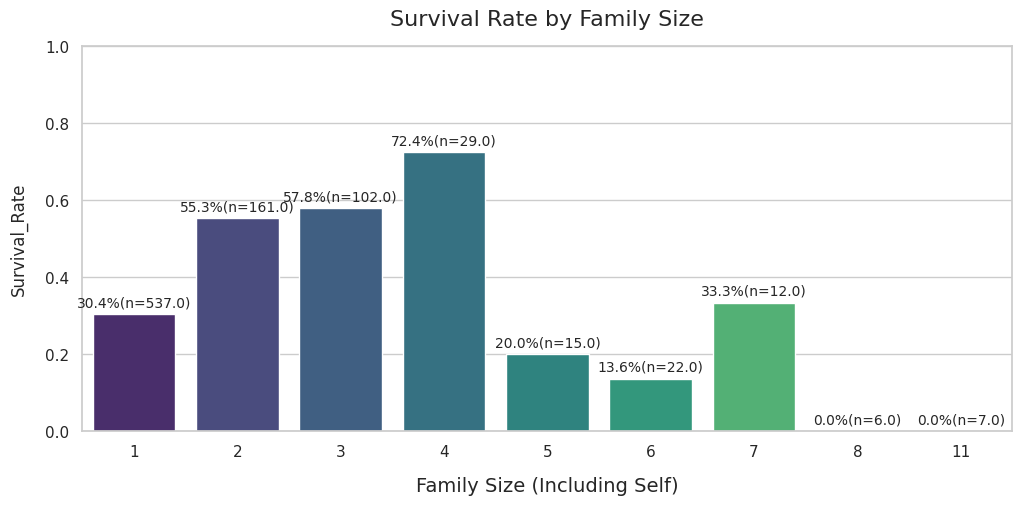

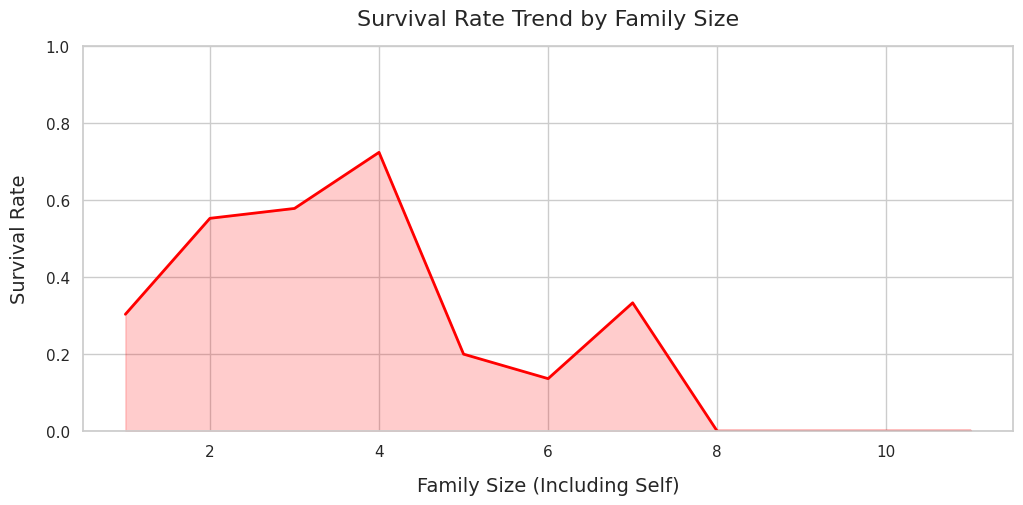

In [ ]:
# Create a bar chart showing the relationship between family size and survival rate.
plt.figure(figsize=(12,5))
sns.barplot(x='FamilySize',y='Survival_Rate',data=family_survival,palette='viridis')
plt.title('Survival Rate by Family Size',fontsize=16)
plt.xlabel('Family Size (Including Self)',fontsize=14)
plt.ylim(0,1)
for idx,row in family_survival.iterrows():
  plt.text(idx,row['Survival_Rate']+0.02,f"{row['Survival_Rate']:.1%}(n={row['Passenger_Count']})",ha='center',fontsize=10)
plt.show()

# Plot a line chart to show the relationship between family size and survival rate.
plt.figure(figsize=(12,5))
sns.lineplot(x='FamilySize',y='Survival_Rate',data=family_survival,marker='',linewidth=2,color='red')
plt.fill_between(family_survival['FamilySize'],family_survival['Survival_Rate'],alpha=0.2,color='red')
plt.title('Survival Rate Trend by Family Size',fontsize=16)
plt.xlabel('Family Size (Including Self)',fontsize=14)
plt.ylabel('Survival Rate',fontsize=14)
plt.ylim(0,1)
plt.grid(True)
plt.show()

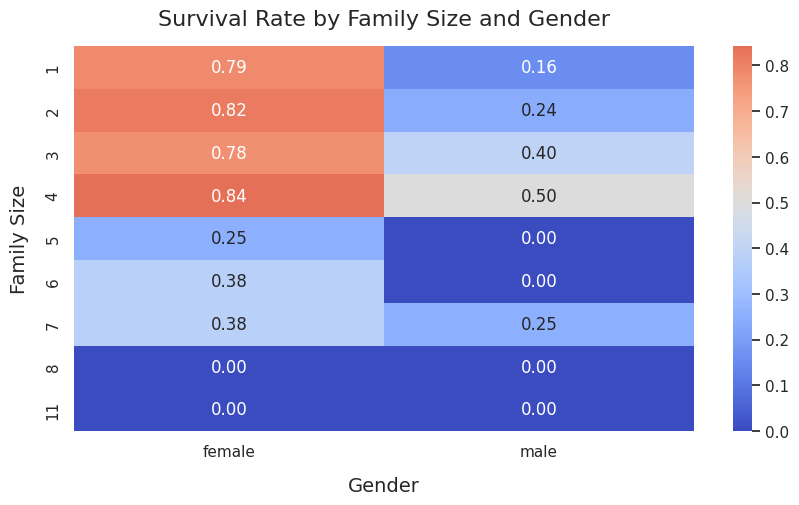

In [ ]:
# Further analyze the differences in survival rates between males and females under different family sizes.
# Calculate the survival rates by grouping according to family size and gender.
family_sex_survival=df.groupby(['FamilySize','Sex'])['Survived'].mean().unstack()

# Plot a visual heatmap to show the differences in survival rates between males and females under different family sizes.
plt.figure(figsize=(10,5))
sns.heatmap(family_sex_survival,annot=True,cmap='coolwarm',fmt='.2f',center=0.5)
plt.title('Survival Rate by Family Size and Gender',fontsize=16)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Family Size',fontsize=14)
plt.show()

Conclusions:

1.Correlation between family size and survival rate:

*  Families with 2 - 4 members had the highest survival rate (>50%).
*  Solo travelers had a relatively low survival rate (30%).

*  In large families (≥5 members), almost no one survived (0% - 27%).

*  The trend shown by the line chart is that when the family size exceeds 4, the survival rate drops sharply.
2.Correlation between gender and survival rate under different family sizes:

*  Females had a higher survival rate than males in all family sizes.
*  Almost no males survived in large families (≥5 members).

*  Females had the highest survival rate (>70%) in families with 2 - 4 members.

Survival Analysis by Title Category:
          SurvivalRate  PassengerCount
Title                                 
Mrs              0.794             126
Miss             0.704             186
Master           0.575              40
Doctor           0.429               7
Military         0.400               5
Nobility         0.333               3
Mr               0.158             518
Clergy           0.000               6


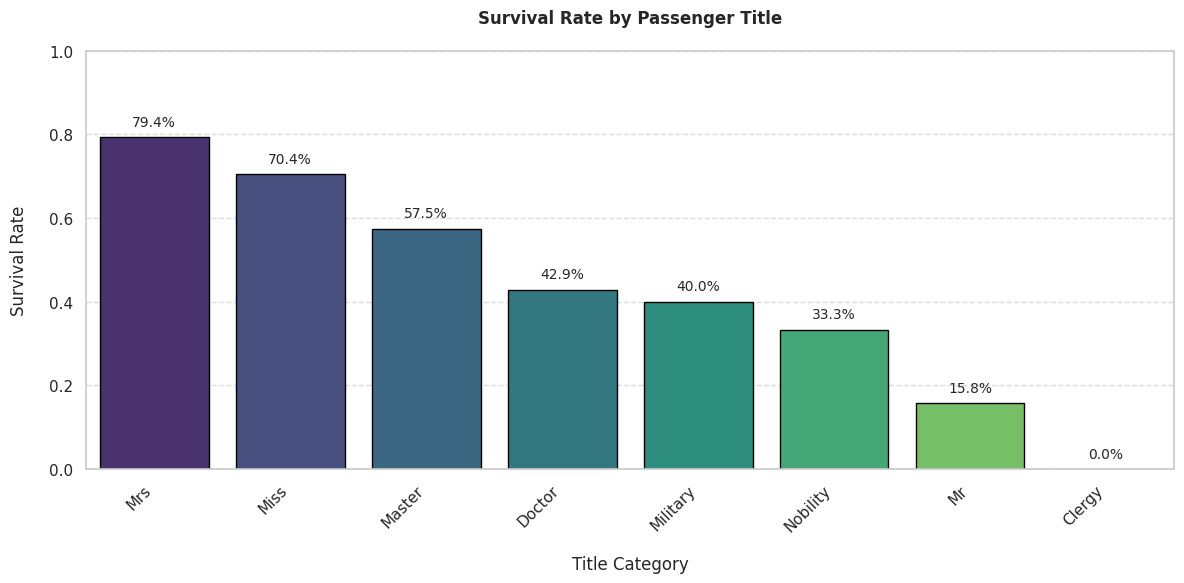

In [ ]:
import re
def process_titles(df):
    """Process passenger titles with special handling for honorifics and professionals."""
# Extract base title
    df['Title'] = df['Name'].apply(lambda x: re.search(r'\b([A-Za-z]+)\.', x).group(1))

# Define preserved titles and their categories
    preserved_mapping = {
        'Dr': 'Doctor',
        'Rev': 'Clergy',
        'Col': 'Military',
        'Major': 'Military',
        'Capt': 'Military',
        'Lady': 'Miss',
        'Sir': 'Mr',
        'Countess': 'Nobility',
        'Don': 'Nobility',
        'Dona': 'Miss',
        'Jonkheer': 'Nobility'
    }

# Standardize common titles
    df['Title'] = df['Title'].replace({
        'Mlle': 'Miss',
        'Ms': 'Miss',
        'Mme': 'Mrs'
    })

# Merge rare titles (count < 10) not in preserved list
    title_counts = df['Title'].value_counts()
    rare_titles = [title for title in title_counts[title_counts < 10].index
                   if title not in preserved_mapping]

# Apply transformations
    df['Title'] = np.where(
        df['Title'].isin(preserved_mapping.keys()),
        df['Title'].map(preserved_mapping),
        np.where(
            df['Title'].isin(rare_titles),
            'Rare',
            df['Title']
        )
    )
    return df

# Load and process data
# df = pd.read_csv('titanic.csv')
df = process_titles(df)

# Analyze survival rates
title_analysis = df.groupby('Title').agg(
    SurvivalRate=('Survived', 'mean'),
    PassengerCount=('Survived', 'count')
).sort_values('SurvivalRate', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=title_analysis.index, y='SurvivalRate', data=title_analysis,
            palette='viridis', edgecolor='black')

# Customize plot
plt.title('Survival Rate by Passenger Title', fontweight='bold', pad=20)
plt.xlabel('Title Category', labelpad=15)
plt.ylabel('Survival Rate', labelpad=15)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display numerical results
print("Survival Analysis by Title Category:")
print(title_analysis.sort_values('SurvivalRate', ascending=False).to_string(float_format="%.3f"))

# Add value labels
for idx, value in enumerate(title_analysis['SurvivalRate']):
    plt.text(idx, value + 0.02, f'{value:.1%}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Conclusions
*   The survival rates of Mrs And Miss are extremely high, which should follow the principle of giving priority to women. However, married women have a higher survival rate, perhaps they have a stronger will to survive because of their families
*   The survival rate of Master and Docter is around 50%.Intellectuals with higher education may have a better ability to save themselves in the most dangerous conditions.
*   There are relatively few samples of soldiers and nobles, so they are not considered.
*   All the priests died may because they had fulfilled their duties and given others the chance to escape.



### 3.2. Data Cleaning & Preprocessing
- **Cleaning Procedures:**
 Detail the steps taken to handle missing data, outliers, and inconsistencies.
- **Feature Engineering:**

- **Preprocessing Steps:**
 Explain normalisation, encoding, or other transformations before modelling.

**3.2.1 Cleaning Procedures:**

- Handle missing value:


In [25]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [12]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/wuke0708/5001/refs/heads/main/Titanic-Dataset.csv")

In [5]:
#Take a look at the data types and the missing situations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Display number missing values per column
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The data shows that there are a total of 891 passengers and 12 columns of features in the training dataset, among which three columns of data are missing:
1. Age: There are only 714 complete records, and 177 records are missing;
2. Embarked : Only two records are missing.
3. Cabin: Only 204 passengers are known, and 687 records are missing. The number of missing records is quite large;

**For Age:**
It was found that all the names contained Title words such as "Mr." and "Mrs", so they were extracted and could be used as an auxiliary feature Title. Then, the median with the same title and Sex was used to fill it

In [9]:
# Extract titles from the Name column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Fill missing Age values based on median Age for each Title and Sex
for title in df['Title'].unique():
    for sex in df['Sex'].unique():
        median_age = df[(df['Title'] == title) & (df['Sex'] == sex)]['Age'].median()
        df.loc[(df['Title'] == title) & (df['Sex'] == sex) & (df['Age'].isnull()), 'Age'] = median_age

# Check if there are still missing values in Age
print("Missing Age values after filling:", df['Age'].isnull().sum())

Missing Age values after filling: 0


**For Embarked:** There are only two missing Embarked. We can filter out these two pieces of information for observation.

In [18]:
# View the rows where Embarked data was lost
missing_embarked = df[df['Embarked'].isnull()]

# Display the rows with missing values
print(missing_embarked)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


After reviewing the data, it was observed that two women shared the same Ticket "113572," stayed in the same Cabin "B28," and were in the same class (Pclass 1). This suggests they may know each other and likely traveled together, boarding the ship at the same port. Therefore, there is no need to handle them separately. Additionally, it is inferred that tickets sold at the same port are connected, so using the same first four digits of the ticket can indicate the same port. Finally, we can find the mode of the Embarked values for tickets with the same class and similar prefixes.

In [20]:
# Extract the first four digits of the Ticket
df['Ticket_Prefix'] = df['Ticket'].str[:4]

# Define a function to fill in the missing Embarked value
def fill_embarked(row):
    if pd.isnull(row['Embarked']):
        # Find the records of the first four digits of the same P-class and Ticket
        similar_tickets = df[(df['Pclass'] == row['Pclass']) &
                              (df['Ticket_Prefix'] == row['Ticket_Prefix'])]
        # Calculate the mode
        mode_embarked = similar_tickets['Embarked'].mode()
        if not mode_embarked.empty:
            return mode_embarked[0]
    return row['Embarked']

# Use a function to fill in the missing values in the Embarked column
df['Embarked'] = df.apply(fill_embarked, axis=1)

# Inspection result
print("Missing Embarked values after filling:", df['Embarked'].isnull().sum())

Missing Embarked values after filling: 0


**For Cabin:** There are quite a few missing cabins, but it was found that the tickets of the same Cabin are also the same. Therefore, it can be inferred that passengers with the same Ticket will also stay in the same Cabin. Thus, the data of passengers with the same Ticket but the Cabin is not empty can be found to fill in:

In [21]:
# Define a function to fill missing Cabin values
def fill_cabin(row):
    if pd.isnull(row['Cabin']):
        # Find records with the same Ticket where Cabin is not null
        similar_cabin = df[(df['Ticket'] == row['Ticket']) & (df['Cabin'].notnull())]
        if not similar_cabin.empty:
            return similar_cabin['Cabin'].values[0]  # Return the first non-null Cabin
    return row['Cabin']

# Apply the function to fill missing Cabin values
df['Cabin'] = df.apply(fill_cabin, axis=1)

# Check the result
print("Missing Cabin values after filling:", df['Cabin'].isnull().sum())

Missing Cabin values after filling: 676


There are too many other uncertainties to be filled, we can replaced with 'U0' to indicate unkown. Although the Cabin data is incomplete, it can still be used to extract new features, as explained below.

In [22]:
# For the Cabin number, since there is too much missing data, the missing data is replaced with 'U0' to indicate unknown
df['Cabin'] = df.Cabin.fillna('U0')

# Check the result
print("Missing Cabin values after filling:", df['Cabin'].isnull().sum())

Missing Cabin values after filling: 0


**3.2.2 Feature Engineering:**

From the previous analysis, we have listed the relationship between some key features and the survival rate for analysis. To create the model, we will extract some new feature values. The feature values that need to be extracted for this model are listed as follows:
* Sex (Gender) : Gender is the most significant physiological characteristic difference among human individuals, influencing physical strength and social status. It is often given preferential treatment in groups (with women being given priority), and the previous characteristic assessment has already indicated that this characteristic is very important.

* AgeLevel: Age affects physical strength and social status. Younger or older people often receive preferential treatment in groups (respecting the elderly and caring for the young). Here, they can be grouped as (child, young, midlife, aged) and extracted based on **Age**.

* IncomeClass: Income determines the type of ship ticket purchased, which in turn determines the location of the cabin and social status. Grouped as no-income, lower-income, middle-income, upper-income, it can be extracted based on **Fare** and **Pclass**

* Social Title: In group activities, different identities obviously also affect group decision-making; Here, they are grouped as Mrs, Miss, Mr and Master, extracted based on **Name**.

* FamilySize(the number of family members on the same boat): Combined as family size, these variables explore whether traveling with family improved survival (e.g., group coordination) or hindered it (e.g., slower evacuation).Based on **SibSp** and **Parch**

* Mates (number of companions) : The number of people traveling together during this voyage (how many people use the same Ticket)

* CabinArea (the area where the Cabin is located) : Obviously, this will affect the timing of escape, based on **Cabin**

* TravelAlone (whether traveling alone or not) : Mates + FamilySize. Whether it's a friend or family member, having one more acquaintance by your side might increase your chances of survival compared to others

1. Extract AgeLevel (age layer)

In [31]:
# Define the age level function
def age_level(age, default="unknown"):
    age_ranges = {
        range(0, 15): 'child',      # 0-14
        range(15, 36): 'young',      # 15-35
        range(36, 61): 'midlife',    # 36-60
        range(61, 91): 'aged'        # 61-90
    }
    for age_range in age_ranges:
        if age in age_range:
            return age_ranges[age_range]
    return default

# Apply the age level function to the Age column
df['AgeLevel'] = df['Age'].apply(age_level)

# Check the result
print(df[['Age', 'AgeLevel']].head())

    Age AgeLevel
0  22.0    young
1  38.0  midlife
2  26.0    young
3  35.0    young
4  35.0    young


2. Extract SocialTitle (social title)

In [36]:
# Extract "Title" from "Name"
df['NameTitle'] = df['Name'].apply(lambda name: re.search(r', ([^.]+)\.', name).group(1))

# Define the social title function
def social_title(title, sex):
    title = title.replace("the ", "")
    if title == 'Dr' and sex == 'female':
        title = 'Mrs'  # Special case
    title_map = {
        'Mr': 'Mr', 'Don': 'Mr', 'Major': 'Mr', 'Capt': 'Mr', 'Jonkheer': 'Mr', 'Rev': 'Mr', 'Col': 'Mr', 'Dr': 'Mr', 'Sir': 'Mr',
        'Miss': 'Miss', 'Mlle': 'Miss', 'Ms': 'Miss', 'Lady': 'Miss', 'Dona': 'Miss',
        'Mrs': 'Mrs', 'Countess': 'Mrs', 'Mme': 'Mrs',
        'Master': 'Master'
    }
    return title_map.get(title, 'Other')  # Default to 'Other' for unspecified titles

# Apply the function to create the SocialTitle column
df['SocialTitle'] = df.apply(lambda row: social_title(row['NameTitle'], row['Sex']), axis=1)

# Check the result
print(df[['Name', 'NameTitle', 'SocialTitle']].head())

                                                Name NameTitle SocialTitle
0                            Braund, Mr. Owen Harris        Mr          Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       Mrs         Mrs
2                             Heikkinen, Miss. Laina      Miss        Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       Mrs         Mrs
4                           Allen, Mr. William Henry        Mr          Mr


In [26]:
# 创建新特征
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# 提取称谓特征
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                        'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# 删除无用特征
return df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


SyntaxError: 'return' outside function (<ipython-input-26-1b5bdbd24a01>, line 14)

### 3.3. Model Development, Training, and Evaluation
- **Modelling Approach:**
 Describe the machine learning models used, why they were chosen, and your overall strategy.
- **Training & Tuning:**
 Provide details on model training, hyperparameter tuning, and cross-validation.
- **Performance Evaluation:**
 Report final evaluation metrics, compare models, and justify your selection of the final model.
- **Interpretation:**
 Discuss what your model outputs mean in relation to your data questions

In [27]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. 数据加载
url = "https://raw.githubusercontent.com/wuke0708/5001/refs/heads/main/Titanic-Dataset.csv"
data = pd.read_csv(url)

# 2. 数据探索
print("数据维度:", data.shape)
print("\n前5行数据:")
print(data.head())
print("\n缺失值统计:")
print(data.isnull().sum())

print("数据列名:", data.columns.tolist())
# 3. 数据预处理
def feature_engineering(df):
    # 处理缺失值
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # 创建新特征
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

    # 提取称谓特征
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                        'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # 删除无用特征
    return df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# 4. 应用数据预处理
data = feature_engineering(data)

# 应用特征工程
processed_data = feature_engineering(data)

# 4. 数据分割
X = processed_data.drop('Survived', axis=1)
y = processed_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. 构建预处理管道
categorical_features = ['Sex', 'Embarked', 'Title']
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 6. 构建完整流水线
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42
    ))
])

# 7. 模型训练
model.fit(X_train, y_train)

# 8. 模型评估
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred))

print("=== 训练集表现 ===")
evaluate_model(model, X_train, y_train)

print("\n=== 测试集表现 ===")
evaluate_model(model, X_test, y_test)

# 9. 特征重要性可视化
feature_names = numerical_features + list(model.named_steps['preprocessor']
                                         .named_transformers_['cat']
                                         .get_feature_names_out(categorical_features))

importances = model.named_steps['classifier'].feature_importances_

plt.figure(figsize=(10, 6))
pd.Series(importances, index=feature_names).nlargest(15).plot(kind='barh')
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.show()

# 10. 预测新数据示例
sample_passenger = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 'male',
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S',
    'Title': 'Mr'
}])

processed_sample = feature_engineering(sample_passenger)
prediction = model.predict(processed_sample)
print(f"\n预测结果: {'幸存' if prediction[0] == 1 else '遇难'}")

数据维度: (891, 12)

前5行数据:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

KeyError: 'Name'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 加载数据
data = pd.read_csv("https://raw.githubusercontent.com/wuke0708/5001/refs/heads/main/Titanic-Dataset.csv")

# 数据预处理
# 选择特征和目标变量
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# 处理缺失值
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # 将性别转换为数字

# 分离特征和目标
X = data[features]
y = data[target]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建和训练决策树模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.71      0.70      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



## 4. Final Insights & Data Story
- **Consolidated Findings:**
 Summarise the key insights obtained from both EDA and modelling.
- **Visual Storytelling:**
 Include final visualisations (charts, graphs, dashboards) that effectively communicate your data stor
y.
- **Impact & Recommendations:**
 Conclude with actionable insights and recommendations based on your analysis.

## 5. Team Reflection & Project Retrospective
- **Individual Contributions**:
 Provide a brief statement outlining each team member’s specific contributions to the project.
- **Team Performance:**
 Reflect on overall team collaboration, noting effective strategies and outcomes.
- **Successes:**
 Highlight what worked well—consider aspects such as clear task division, communication, and iterative feedback.
- **Challenges & Areas for Improvement:**
 Discuss any challenges experienced (e.g., miscommunication, technical obstacles) and propose stra
tegies for future projects.

## 6. Next Steps & Future Work
- **Further Analysis:**
 Outline potential improvements to your model or additional research questions that could be explore
d.
- **Scalability & Application:**
 Discuss how your findings may be applied in a real-world context.

 ## 6. Team Reflection
- **Individual Contributions:**
 Provide a brief statement outlining each team member's specific contributions to the project.
 * Junting Wu:As the team leader, I am mainly responsible for task allocation, plan formulation and report writing. And the pre-processing and simple analysis of the data were carried out.
 * Hong Xiao:The main focus was on identifying the hidden information of the data, discovering the possible multi-dimensional influencing factors, and analyzing the possible impact of different occupations and identity differences on the survival rate.
 * Kuangfeng Gong:Mainly responsible for project overview and goal setting, dataset overview introduction, and EDA result analysis.
 * Linyun Zheng: Preprocessing of the data, including handling missing values in the embarkation port information, helps reveal the underlying connections between this representative variable and other key factors such as gender, ticket class, and age.
 * Yiran Liu：Responsible for and multi-dimensional analysis,through statistical modeling and visualization techniques,reveal that gender is a core driving factor for survival rate,and that the high ticket price has a significant reinforcement effect on female survival rate.
 * Ziyan Wan: Responsible for part of the data analysis work, review materials to analyze the influencing factors of the data, and conduct an analysis on these influencing factors.
- **What Worked Well:**
 * During the project's progress, while holding multiple group meetings, cooperation and communication among two or three people were also carried out, which improved work efficiency.
 * Meanwhile, all the team members participated in the project and played their unique roles.
 * A relatively thorough analysis was conducted on the data, covering all available eigenvalues.
 * Checking each other's work results has prevented many mistakes from happening.
- **What Could Be Improved:**
 * Members of the team may forget some contents that have been discussed and determined. In the future, a memo for team sharing can be established.
 * Everyone's working hours and efficiency vary, making it difficult to integrate the issues for discussion together. In the future, more explicit deadlines can be set for each task.